In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shwetwasnik","key":"655ba396dbe8a157ff0c26750fb035a4"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d mlg-ulb/creditcardfraud
!unzip creditcardfraud.zip


Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
  0% 0.00/66.0M [00:00<?, ?B/s]
100% 66.0M/66.0M [00:00<00:00, 1.18GB/s]
Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In the above two blocks we imported the kaggle dataset into this notebook.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
dataset = pd.read_csv('creditcard.csv')
dataset.head()
#head prints top five rows

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#The data is not normalized
#Now check if the dataset is balanced
dataset['Class'].value_counts()

,count
Class,
0,284315
1,492


In [ ]:
#Since the dataset is highly unbalanced, we will either perform oversampling or undersampling.
#lets learn more about the data (plot graphs if necessary)
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
#we ought to bring the time and amount parameters in the range 0-1. This leads to faster gradient descent.
#for this we can use RobustScaler or simply divide by max to get in the ranfe 0-1
dataset['Time'] = dataset['Time']/dataset['Time'].max()
dataset['Amount'] = dataset['Amount']/dataset['Amount'].max()

#now lets see the difference
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.005824,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.000105,0
2,0.000006,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.014739,0
3,0.000006,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.004807,0
4,0.000012,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.002724,0


In [ ]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,0.548717,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,0.003439,0.001727
std,0.274828,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,0.009736,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,0.313681,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,0.000218,0.000000
50%,0.490138,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000856,0.000000
75%,0.806290,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.003004,0.000000
max,1.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.000000,1.000000


In [ ]:
#70-30 train-test split
from sklearn.model_selection import train_test_split

x_data = dataset.drop('Class', axis=1)
y_data = dataset['Class']

x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.3,random_state=42)

In [ ]:
x_train.describe(), x_test.describe()

(                Time             V1             V2             V3  \
 count  199364.000000  199364.000000  199364.000000  199364.000000   
 mean        0.548336      -0.001491      -0.002331       0.002040   
 std         0.274748       1.960957       1.667882       1.514420   
 min         0.000000     -56.407510     -72.715728     -48.325589   
 25%         0.313533      -0.920935      -0.599013      -0.885992   
 50%         0.489632       0.013616       0.066441       0.182979   
 75%         0.805913       1.314703       0.803312       1.028217   
 max         1.000000       2.454930      22.057729       4.187811   
 
                   V4             V5             V6             V7  \
 count  199364.000000  199364.000000  199364.000000  199364.000000   
 mean       -0.001072       0.000499      -0.001898       0.002623   
 std         1.416783       1.393311       1.337511       1.248391   
 min        -5.683171    -113.743307     -26.160506     -43.557242   
 25%        -0.849

In [ ]:
#lets perform sampling now
#OverSampling -> Retains Data, slower training, Best for small datasets, Overfitting risk is low
#UnderSampling -> Might lose data, faster training, best for huge datasets, Overfitting risk is high

#in this case we will perform undersampling first
#always perform sampling on training dataset only
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

x_train_sampled, y_train_sampled = smote.fit_resample(x_train, y_train)



```
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
```
3A. OVERSAMPLING using SMOTE
```
smote = SMOTE(random_state=42)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print("After SMOTE oversampling:", Counter(y_train_over))
```
3B. UNDERSAMPLING using RandomUnderSampler
```
under = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under.fit_resample(X_train, y_train)
print("After undersampling:", Counter(y_train_under))
```

In [ ]:
x_train_sampled.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,398016.000000,398016.000000,398016.000000,398016.000000,398016.000000,398016.000000,398016.000000,398016.000000,398016.000000,398016.000000,...,398016.000000,398016.000000,398016.000000,398016.000000,398016.000000,398016.000000,398016.000000,398016.000000,398016.000000,398016.000000
mean,0.500110,-2.074055,1.703650,-3.301796,2.244145,-1.419654,-0.755065,-2.532797,0.518744,-1.281455,...,0.166156,0.308190,0.015675,-0.043768,-0.048473,0.035902,0.041418,0.092673,0.047695,0.003652
std,0.272415,5.147083,3.383282,5.916862,3.126727,3.950613,1.603951,5.352886,3.576111,2.257571,...,0.906456,1.873699,0.902405,0.884438,0.541423,0.613710,0.450647,0.938945,0.423581,0.008772
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.320155,...,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-9.895244,-15.430084,0.000000
25%,0.270977,-2.484015,-0.113361,-5.075170,-0.078699,-1.615671,-1.576496,-2.849404,-0.178882,-2.266816,...,-0.180995,-0.152645,-0.512295,-0.224467,-0.379574,-0.287422,-0.265701,-0.058533,-0.050788,0.000105
50%,0.451091,-0.656824,0.976047,-1.341161,1.354277,-0.399121,-0.684865,-0.636160,0.163223,-0.711953,...,0.042329,0.156226,0.026512,-0.041810,0.000199,0.054580,0.012660,0.048364,0.036931,0.000882
75%,0.763557,1.054420,2.811959,0.342661,4.272321,0.485310,-0.008591,0.275124,0.839435,0.161171,...,0.400779,0.637559,0.521403,0.157608,0.350520,0.381843,0.330828,0.451213,0.208169,0.003892
max,1.000000,2.454930,22.057729,4.187811,16.875344,34.801666,73.301626,120.589494,20.007208,10.348407,...,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,1.000000


In [ ]:
x_train.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,...,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000
mean,0.548336,-0.001491,-0.002331,0.002040,-0.001072,0.000499,-0.001898,0.002623,-0.001166,-0.000327,...,0.000110,-0.000309,-0.001793,-0.000179,-0.000634,-0.000958,0.000671,-0.000575,-0.000022,0.003456
std,0.274748,1.960957,1.667882,1.514420,1.416783,1.393311,1.337511,1.248391,1.188393,1.097011,...,0.779766,0.731509,0.725378,0.633316,0.605789,0.522343,0.482478,0.406323,0.329310,0.010059
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.320155,...,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-9.895244,-15.430084,0.000000
25%,0.313533,-0.920935,-0.599013,-0.885992,-0.849764,-0.689221,-0.768043,-0.551137,-0.207810,-0.642266,...,-0.211992,-0.228998,-0.543142,-0.161315,-0.354771,-0.317579,-0.326848,-0.071015,-0.053090,0.000218
50%,0.489632,0.013616,0.066441,0.182979,-0.021602,-0.056453,-0.274239,0.042759,0.022222,-0.050710,...,-0.062608,-0.029860,0.005059,-0.010632,0.040783,0.014793,-0.050547,0.001238,0.011385,0.000856
75%,0.805913,1.314703,0.803312,1.028217,0.741059,0.609969,0.394597,0.570624,0.326793,0.597237,...,0.133469,0.186112,0.526039,0.147780,0.439039,0.350492,0.242133,0.091392,0.078537,0.003012
max,1.000000,2.454930,22.057729,4.187811,16.875344,34.801666,73.301626,120.589494,20.007208,10.348407,...,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

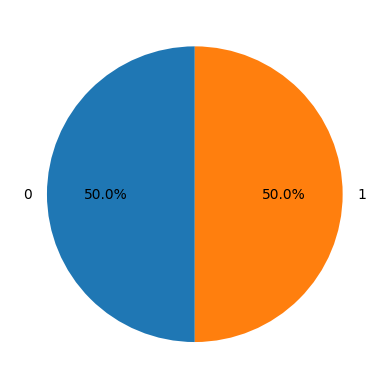

In [ ]:
#to check if the dataset is finally balanced or not, you can use a plot to visualise it

from collections import Counter
#Counter is similar to levels in R but more advanced

counter = Counter(y_train_sampled)

plt.pie(counter.values(), labels=counter.keys(), autopct='%1.1f%%', startangle=90)
plt.show

In [ ]:
#Now we can start buidling our model. But how to choose which model to use?
#Check out the below text box


```
# ------------------- MODEL COMPARISON GUIDE -------------------

# LinearRegression
# → Predicts a continuous value by fitting a straight line to the data.
# → Fast, interpretable, assumes linearity, sensitive to outliers
# → Best for: simple relationships with numeric output

# LogisticRegression
# → Estimates the probability of a binary class using a sigmoid function.
# → Fast, interpretable, works well with linearly separable data
# → Best for: binary classification, small datasets, baseline models

# DecisionTree
# → Splits data into branches based on feature thresholds to make predictions.
# → Easy to interpret, prone to overfitting, no scaling needed
# → Best for: rule-based problems, small to mid-size data

# RandomForest
# → An ensemble of decision trees trained on random subsets and averaged.
# → High accuracy, handles missing data, less overfitting than a single tree
# → Best for: most tabular datasets, classification and regression

# XGBoost
# → Gradient boosting that builds trees sequentially to fix previous errors.
# → Fast, accurate, handles missing data, regularized
# → Best for: competitions, structured/tabular data, imbalanced datasets

# KNN (K-Nearest Neighbors)
# → Predicts by majority vote (classification) or average (regression) of nearest neighbors.
# → No training, slow inference, distance-based
# → Best for: small datasets, non-linear patterns

# NeuralNetwork (MLP)
# → Learns patterns through layers of neurons and non-linear activation functions.
# → Powerful, requires tuning and lots of data, black-box
# → Best for: non-linear, high-dimensional problems

# CNN (Convolutional Neural Network)
# → Extracts spatial features using convolutional layers.
# → Great for image data, needs a lot of data, GPU recommended
# → Best for: image classification, computer vision tasks

# RNN / LSTM
# → Processes sequences using memory of previous inputs.
# → Good for time series/text, can be slow, harder to train
# → Best for: text generation, time-series forecasting, NLP

```



In [ ]:
#in this problem the best performing models will be RandomForest, XGBoost, carefully planned neural network.
#the original owner used neural network so lets build a network which peforms better than him

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, InputLayer, Dropout

In [ ]:
model = Sequential()
model.add(InputLayer((x_train_sampled.shape[1],)))
model.add(Dense(128, 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(64, 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(32, 'relu'))
model.add(BatchNormalization())
model.add(Dense(1, 'sigmoid'))

#BatchNormalization is a layer which normalizes the results of the previous layers

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy')

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

y_train_array = np.array(y_train)

model.fit(x_train_sampled, y_train_sampled, epochs=10)

Epoch 1/10
12438/12438 ━━━━━━━━━━━━━━━━━━━━ 46s 4ms/step - loss: 0.0041
Epoch 2/10
12438/12438 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - loss: 0.0041
Epoch 3/10
12438/12438 ━━━━━━━━━━━━━━━━━━━━ 43s 3ms/step - loss: 0.0039
Epoch 4/10
12438/12438 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - loss: 0.0035
Epoch 5/10
12438/12438 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - loss: 0.0036
Epoch 6/10
12438/12438 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 0.0032
Epoch 7/10
12438/12438 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - loss: 0.0035
Epoch 8/10
12438/12438 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - loss: 0.0037
Epoch 9/10
12438/12438 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step - loss: 0.0030
Epoch 10/10
12438/12438 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - loss: 0.0034


In [ ]:
#Now lets test our model's metrics

y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.7).astype(int)

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.69      0.84      0.76       136

    accuracy                           1.00     85443
   macro avg       0.85      0.92      0.88     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
#so the metrics here are not that great but how do we know?
# ------------------ CLASSIFICATION METRICS EXPLAINED ------------------

# Accuracy
# → (TP + TN) / (Total)
# → Measures overall correctness
# → Good when classes are balanced
# Example: accuracy_score(y_test, y_pred)

# Precision
# → TP / (TP + FP)
# → Of all predicted positives, how many were correct?
# → Important when False Positives are costly (e.g., spam detection)
# Example: precision_score(y_test, y_pred)

# Recall (Sensitivity or True Positive Rate)
# → TP / (TP + FN)
# → Of all actual positives, how many were correctly predicted?
# → Important when False Negatives are costly (e.g., disease detection)
# Example: recall_score(y_test, y_pred)

# F1 Score
# → Harmonic mean of Precision and Recall: 2 * (P * R) / (P + R)
# → Balances precision and recall; useful on imbalanced datasets
# Example: f1_score(y_test, y_pred)


In [ ]:
#But how to improve?
#Precision Low -> increase threshold, add layers, perform regularization
#Recall Low -> decrese threshold, try simpler models, perform normalization

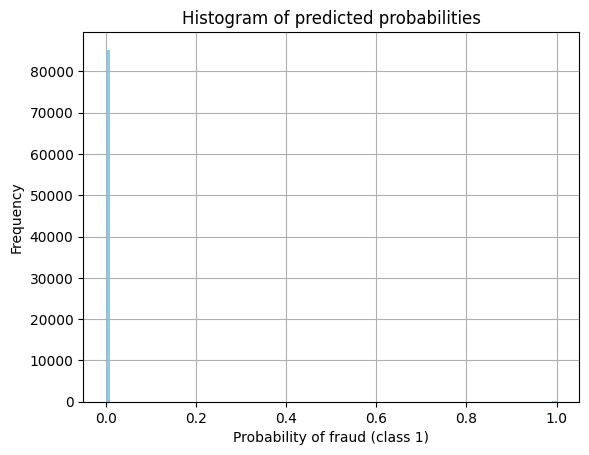

In [ ]:
import matplotlib.pyplot as plt

plt.hist(y_pred, bins=100, color='skyblue')
plt.title("Histogram of predicted probabilities")
plt.xlabel("Probability of fraud (class 1)")
plt.ylabel("Frequency")
plt.grid()
plt.show()


In [ ]:
#lets use stacked models
from xgboost import XGBClassifier

model_xgb = XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

model_xgb.fit(x_train_sampled, y_train_sampled)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:39:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
# NN predictions (probabilities)
y_pred_nn_proba = model.predict(x_test).ravel()
y_pred_nn = (y_pred_nn_proba > 0.6).astype(int)

# XGB predictions (probabilities)
y_pred_xgb_proba = model_xgb.predict_proba(x_test)[:, 1]
y_pred_xgb = (y_pred_xgb_proba > 0.7).astype(int)


2671/2671 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


In [ ]:
# Ensemble prediction: only if BOTH models say it's fraud (AND logic)
y_ensemble = ((y_pred_nn + y_pred_xgb) == 2).astype(int)


In [ ]:
print(classification_report(y_test, y_ensemble))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.76      0.85      0.80       136

    accuracy                           1.00     85443
   macro avg       0.88      0.92      0.90     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
#shit fucking works well